# Visualising time series data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Import emergency department reattendance data.**  

This is a time series from a hospital that measures the number of patients per month that have reattended an ED within 7 days of a previous attendance.

This can be found in **"data/ed_reattend.csv"**

* Hint 1: look back at the lecture notes and see how `pd.read_csv()` was used.  

* Hint 2: The format of the 'date' column is in UK standard dd/mm/yyyy.  You will need to set the `dayfirst=True` of `pd.read_csv()` to make sure pandas interprets the dates correctly.

* Hint 3: The data is monthly and the dates are all the first day of the month.  This is called monthly start and its shorthand is 'MS'

In [2]:
url = 'https://raw.githubusercontent.com/hsma-master/hsma/master/12_forecasting/data/ed_reattend.csv'
reattends = pd.read_csv(url, index_col='date', 
                        parse_dates=True, dayfirst=True)
reattends.index.freq = 'MS'

**Step 2: Check the shape of the `DataFrame` and print out the first 5 observations**

In [3]:
reattends.shape

(43, 1)

In [4]:
reattends.head()

,reattends
date,
2014-04-01,1094
2014-05-01,1266
2014-06-01,1170
2014-07-01,1239
2014-08-01,1197


**Step 3: Check the minimum and maximum date of the series**



In [5]:
reattends.index.min()

Timestamp('2014-04-01 00:00:00', freq='MS')

In [6]:
reattends.index.max()

Timestamp('2017-10-01 00:00:00', freq='MS')

**Step 4: Create a basic plot of the time series**

<AxesSubplot:xlabel='date'>

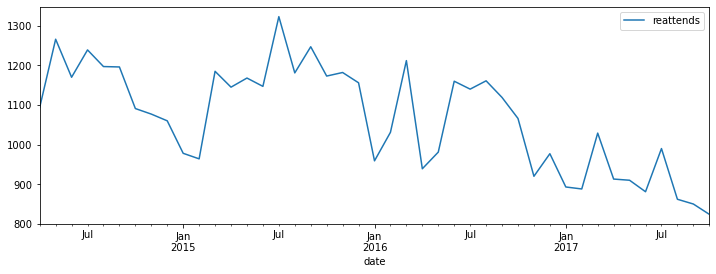

In [7]:
reattends.plot(figsize=(12,4))

**Step 5: Improve the appearance of your chart**
    
Try the following:
    
* Add a y-axis label
* Add gridlines to the plot
* Add markers to block
* Change the colour of the line
* Experiment with using seaborn

Text(0, 0.5, 'reattends within 7 days')

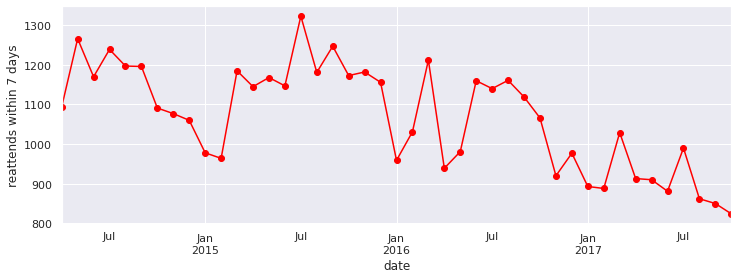

In [8]:
sns.set()
ax = reattends.plot(figsize=(12,4), color='red', marker='o', legend=False)
ax.set_ylabel('reattends within 7 days')

**Step 6: Perform a calender adjustment**

The data is at the monthly level.  Therefore some of the noise in the time series is due to the differing number of days per month.  Perform a calender adjust and plot the daily rate of reattendance.

Text(0, 0.5, 'mean reattends within 7 days')

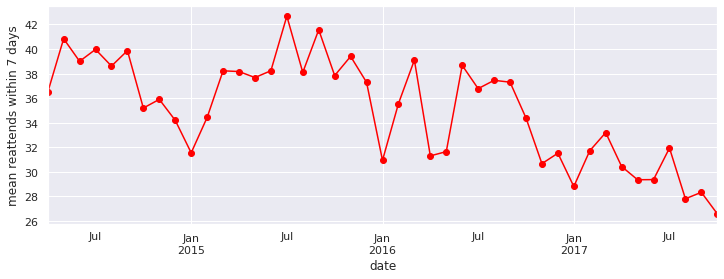

In [9]:
reattend_rate = reattends['reattends'] / reattends.index.days_in_month
ax = reattend_rate.plot(figsize=(12,4), color='red', marker='o', legend=False)
ax.set_ylabel('mean reattends within 7 days')

**Step 7: Run a smoother through the series to assess trend**

Hint:  Try using the `.rolling` method of dataframe with a `window=12` and `center=True` to create a 12 month centred moving average 

Is there any benefit from switchoing to a 6 month MA?  Why does the 6-MA look different to the 12-MA.

Use the calender adjusted data.

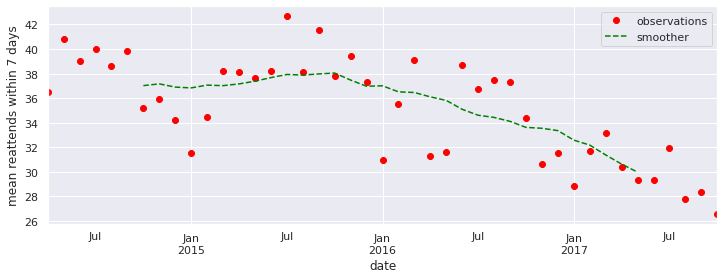

In [10]:
WINDOW = 12
smoother = reattend_rate.rolling(window=WINDOW, center=True).mean()

ax = reattend_rate.plot(figsize=(12,4), color='red', marker='o', linestyle='')
smoother.plot(ax=ax, color='green', linestyle='--')
ax.set_ylabel('mean reattends within 7 days')
ax.legend(['observations', 'smoother'])

**Step 8: Perform a seasonal decomposition on the time series**

Plot the trend, seasonal and remainder components of the decomposition.

Try both an additive and multiplicative model.  What is the difference between the two models?

* Hint: Look back at the lecture for a function to help you.




In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decomp = seasonal_decompose(reattend_rate, period=12, model='add')

<AxesSubplot:xlabel='date'>

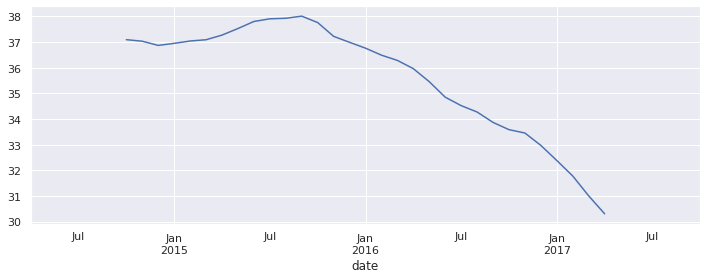

In [13]:
decomp.trend.plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

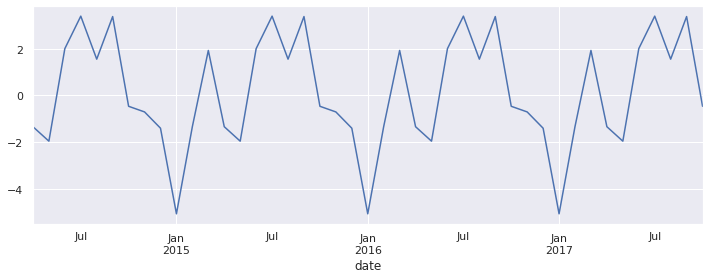

In [14]:
decomp.seasonal.plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

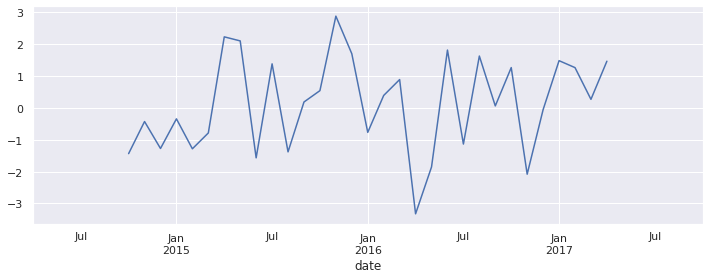

In [15]:
decomp.resid.plot(figsize=(12,4))